In [12]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# DataFrame 1: January
df_january = pd.DataFrame({
    'job_id': [101, 102, 103, 104, 105],
    'job_title': ['Data Analyst', 'Software Engineer', 'Product Manager', 'UX Designer', 'Marketing Specialist'],
    'company_name': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': ['2024-01-02', '2024-01-06', '2024-01-11', '2024-01-19', '2024-01-27']
})

# DataFrame 2: February
df_february = pd.DataFrame({
    'job_id': [106, 107, 108, 109, 110],
    'job_title': ['Data Analyst', 'Software Engineer', 'Product Manager', 'UX Designer', 'Marketing Specialist'],
    'company_name': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': ['2024-02-02', '2024-02-10', '2024-02-15', '2024-02-24', '2024-02-26']
})

# creating 2 new data frames to practice this merge technique

In [13]:
df_january

,job_id,job_title,company_name,job_posted_date
0,101,Data Analyst,Company A,2024-01-02
1,102,Software Engineer,Company B,2024-01-06
2,103,Product Manager,Company C,2024-01-11
3,104,UX Designer,Company D,2024-01-19
4,105,Marketing Specialist,Company E,2024-01-27


In [14]:
df_february

,job_id,job_title,company_name,job_posted_date
0,106,Data Analyst,Company F,2024-02-02
1,107,Software Engineer,Company G,2024-02-10
2,108,Product Manager,Company H,2024-02-15
3,109,UX Designer,Company I,2024-02-24
4,110,Marketing Specialist,Company J,2024-02-26


In [15]:
pd.concat([df_january, df_february], ignore_index=True)

# using ignore index will basically get rid of the original indexes and make a new one for this specific set
# of concatenated data

,job_id,job_title,company_name,job_posted_date
0,101,Data Analyst,Company A,2024-01-02
1,102,Software Engineer,Company B,2024-01-06
2,103,Product Manager,Company C,2024-01-11
3,104,UX Designer,Company D,2024-01-19
4,105,Marketing Specialist,Company E,2024-01-27
5,106,Data Analyst,Company F,2024-02-02
6,107,Software Engineer,Company G,2024-02-10
7,108,Product Manager,Company H,2024-02-15
8,109,UX Designer,Company I,2024-02-24
9,110,Marketing Specialist,Company J,2024-02-26


In [16]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# data for real example with provided dataset

In [18]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')
df

# creating new month column

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [ ]:
# dict_months = {
#   'Jan': df_jan,
#   'Feb': df_feb,
#   'Mar': df_mar,
#   'Apr': df_apr,
#   'May': df_may,
#   'Jun': df_jun,
#   'Jul': df_jul,
#   'Aug': df_aug,
#   'Sep': df_sep,
#   'Oct': df_oct,
#   'Nov': df_nov,
#   'Dec': df_dec,
#} This is show how we are going to use list comprehension to make differeent dataframes that way we can ultimately walk through
# antoher merge example

months = df['job_posted_month'].unique()

dict_months = {month:  df[df['job_posted_month'] == month] for month in months}

dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


### Boss Needs 2023 Q1 Data

In [ ]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

# merging those new dataframes we made to have only quarter 1 data assigned to this new df

<Axes: xlabel='job_posted_month'>

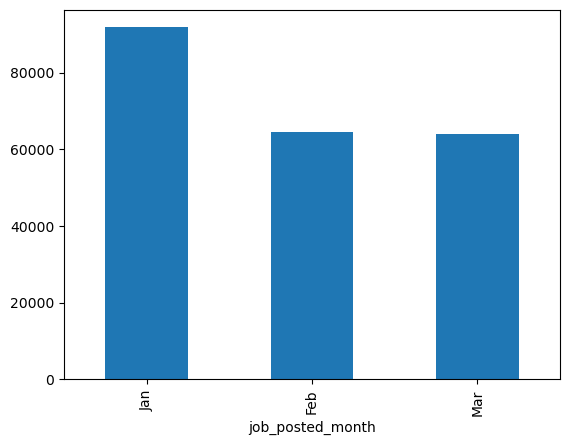

In [ ]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

# simply using a visualization to make sure that this new df we created only has Q1 data in it